# Start


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
folder = Path(
    "/Users/kristianbraad/Library/CloudStorage/OneDrive-Aarhusuniversitet/"
    "4. Semester/Dataprojekt/Dataprojekt AU 2026/2023 AAR vaskeri data"
)
files = list(folder.glob("PLC*.xlsx"))            # matches PLC, Product....xlsx etc.

dfs = []
for f in files:
    df = pd.read_excel(f, header=2)                         # optionally: sheet_name="Sheet1"
    df["source_file"] = f.name                    # helpful traceability
    dfs.append(df)

all_data = pd.concat(dfs, ignore_index=True)
print(all_data.shape)
print(all_data.columns)
group_col = "Produkt - Produkt"

groups = {gid: gdf.copy() for gid, gdf in all_data.groupby(group_col, dropna=False)}
print("Number of groups:", len(groups))
print("Example group keys:", list(groups.keys())[:10])


# Grouping
groups = {k: g.copy() for k, g in all_data.groupby(group_col, dropna=False)}
groups["04198 Benkl Hr Navy"]
summary = (
    all_data
    .groupby(["Produkt - Produkt", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .reset_index()
)
print(summary)
most_discarded = (
    all_data
    .groupby("Produkt - Produkt")["Stk. tøj per kassationsdato"]
    .sum()
    .sort_values(ascending=False)
)

most_discarded.head(10)

(248711, 7)
Index(['Produkt - Produkt', 'Kassationsårsag (ui)',
       'Stk. tøj per kassationsdato', 'Dage i cirkulation', 'Total antal vask',
       'Unik Kode (ui)', 'source_file'],
      dtype='object')
Number of groups: 1958
Example group keys: ['00066 Kokkejakke Sort Lechef P/B', '00100 Unisexben Lårl & Toml Mblåpb', '00101 Kit Kina H 2Indv Mblå Trykkn', '00215 Termojakke Hvid', '00221 Termovest Hvid', '00262 Shorts Hr Grå/Sort P/B', '00264 Forkl M/Smæk Grå P/B', '00281 Sweatshirt Grafitmelan 70/30', '00379 Benkl Vente Navy P/B', '00448 Kedeldr Polar M/H Mblå']
                       Produkt - Produkt                 Kassationsårsag (ui)  \
0       00066 Kokkejakke Sort Lechef P/B            Misligholdt med restværdi   
1     00100 Unisexben Lårl & Toml Mblåpb              Alm.slid uden restværdi   
2     00100 Unisexben Lårl & Toml Mblåpb              BTS fejl uden restværdi   
3     00100 Unisexben Lårl & Toml Mblåpb             Bortkommet med restværdi   
4     00100 Unisexben

Produkt - Produkt
09385 T-Shirt Hvid B/P M Arla Tryk    7200
23191 Benkl Mind pullon m opsmøg      7064
01083 T-Shirt unisex hvid k/æ P/B     6779
01589 T-shirt unisex mblå k/æ         6696
13084 T-shirt prowear dame navy pb    6152
14152 Benkl m/lom hvid low risk       5062
28793 Benkl M/Lom Grå Low Risk        4435
12143 Pull on let buks opsmøg mblå    4256
24781 Flex buks da CSR dark rock      4164
09813 T-Shirt Vask                    3781
Name: Stk. tøj per kassationsdato, dtype: int64

# Scatter plots

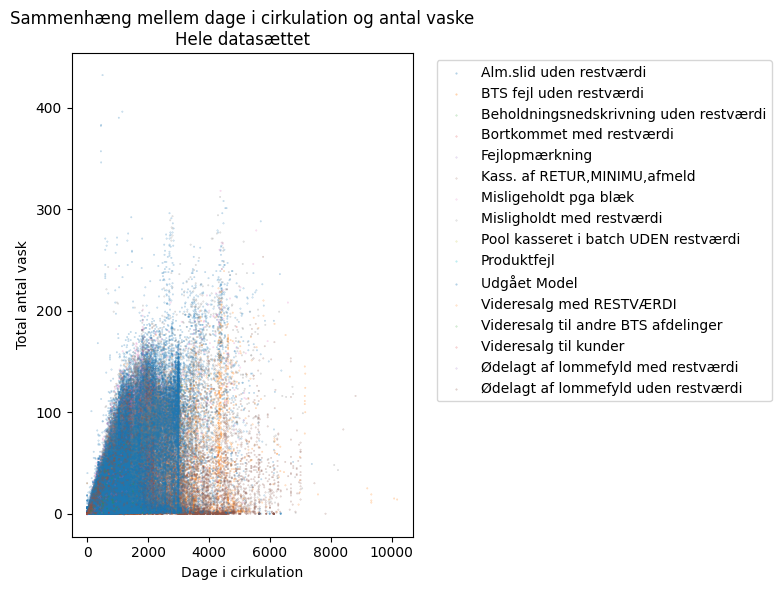

In [2]:

plt.figure(figsize=(8,6))

for reason, g in all_data.groupby("Kassationsårsag (ui)"):
    plt.scatter(
        g["Dage i cirkulation"],
        g["Total antal vask"],
        s=g["Stk. tøj per kassationsdato"] * 0.1,  # boblestørrelse
        alpha=0.4,
        label=reason
    )

plt.xlabel("Dage i cirkulation")
plt.ylabel("Total antal vask")
plt.title("Sammenhæng mellem dage i cirkulation og antal vaske\nHele datasættet")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

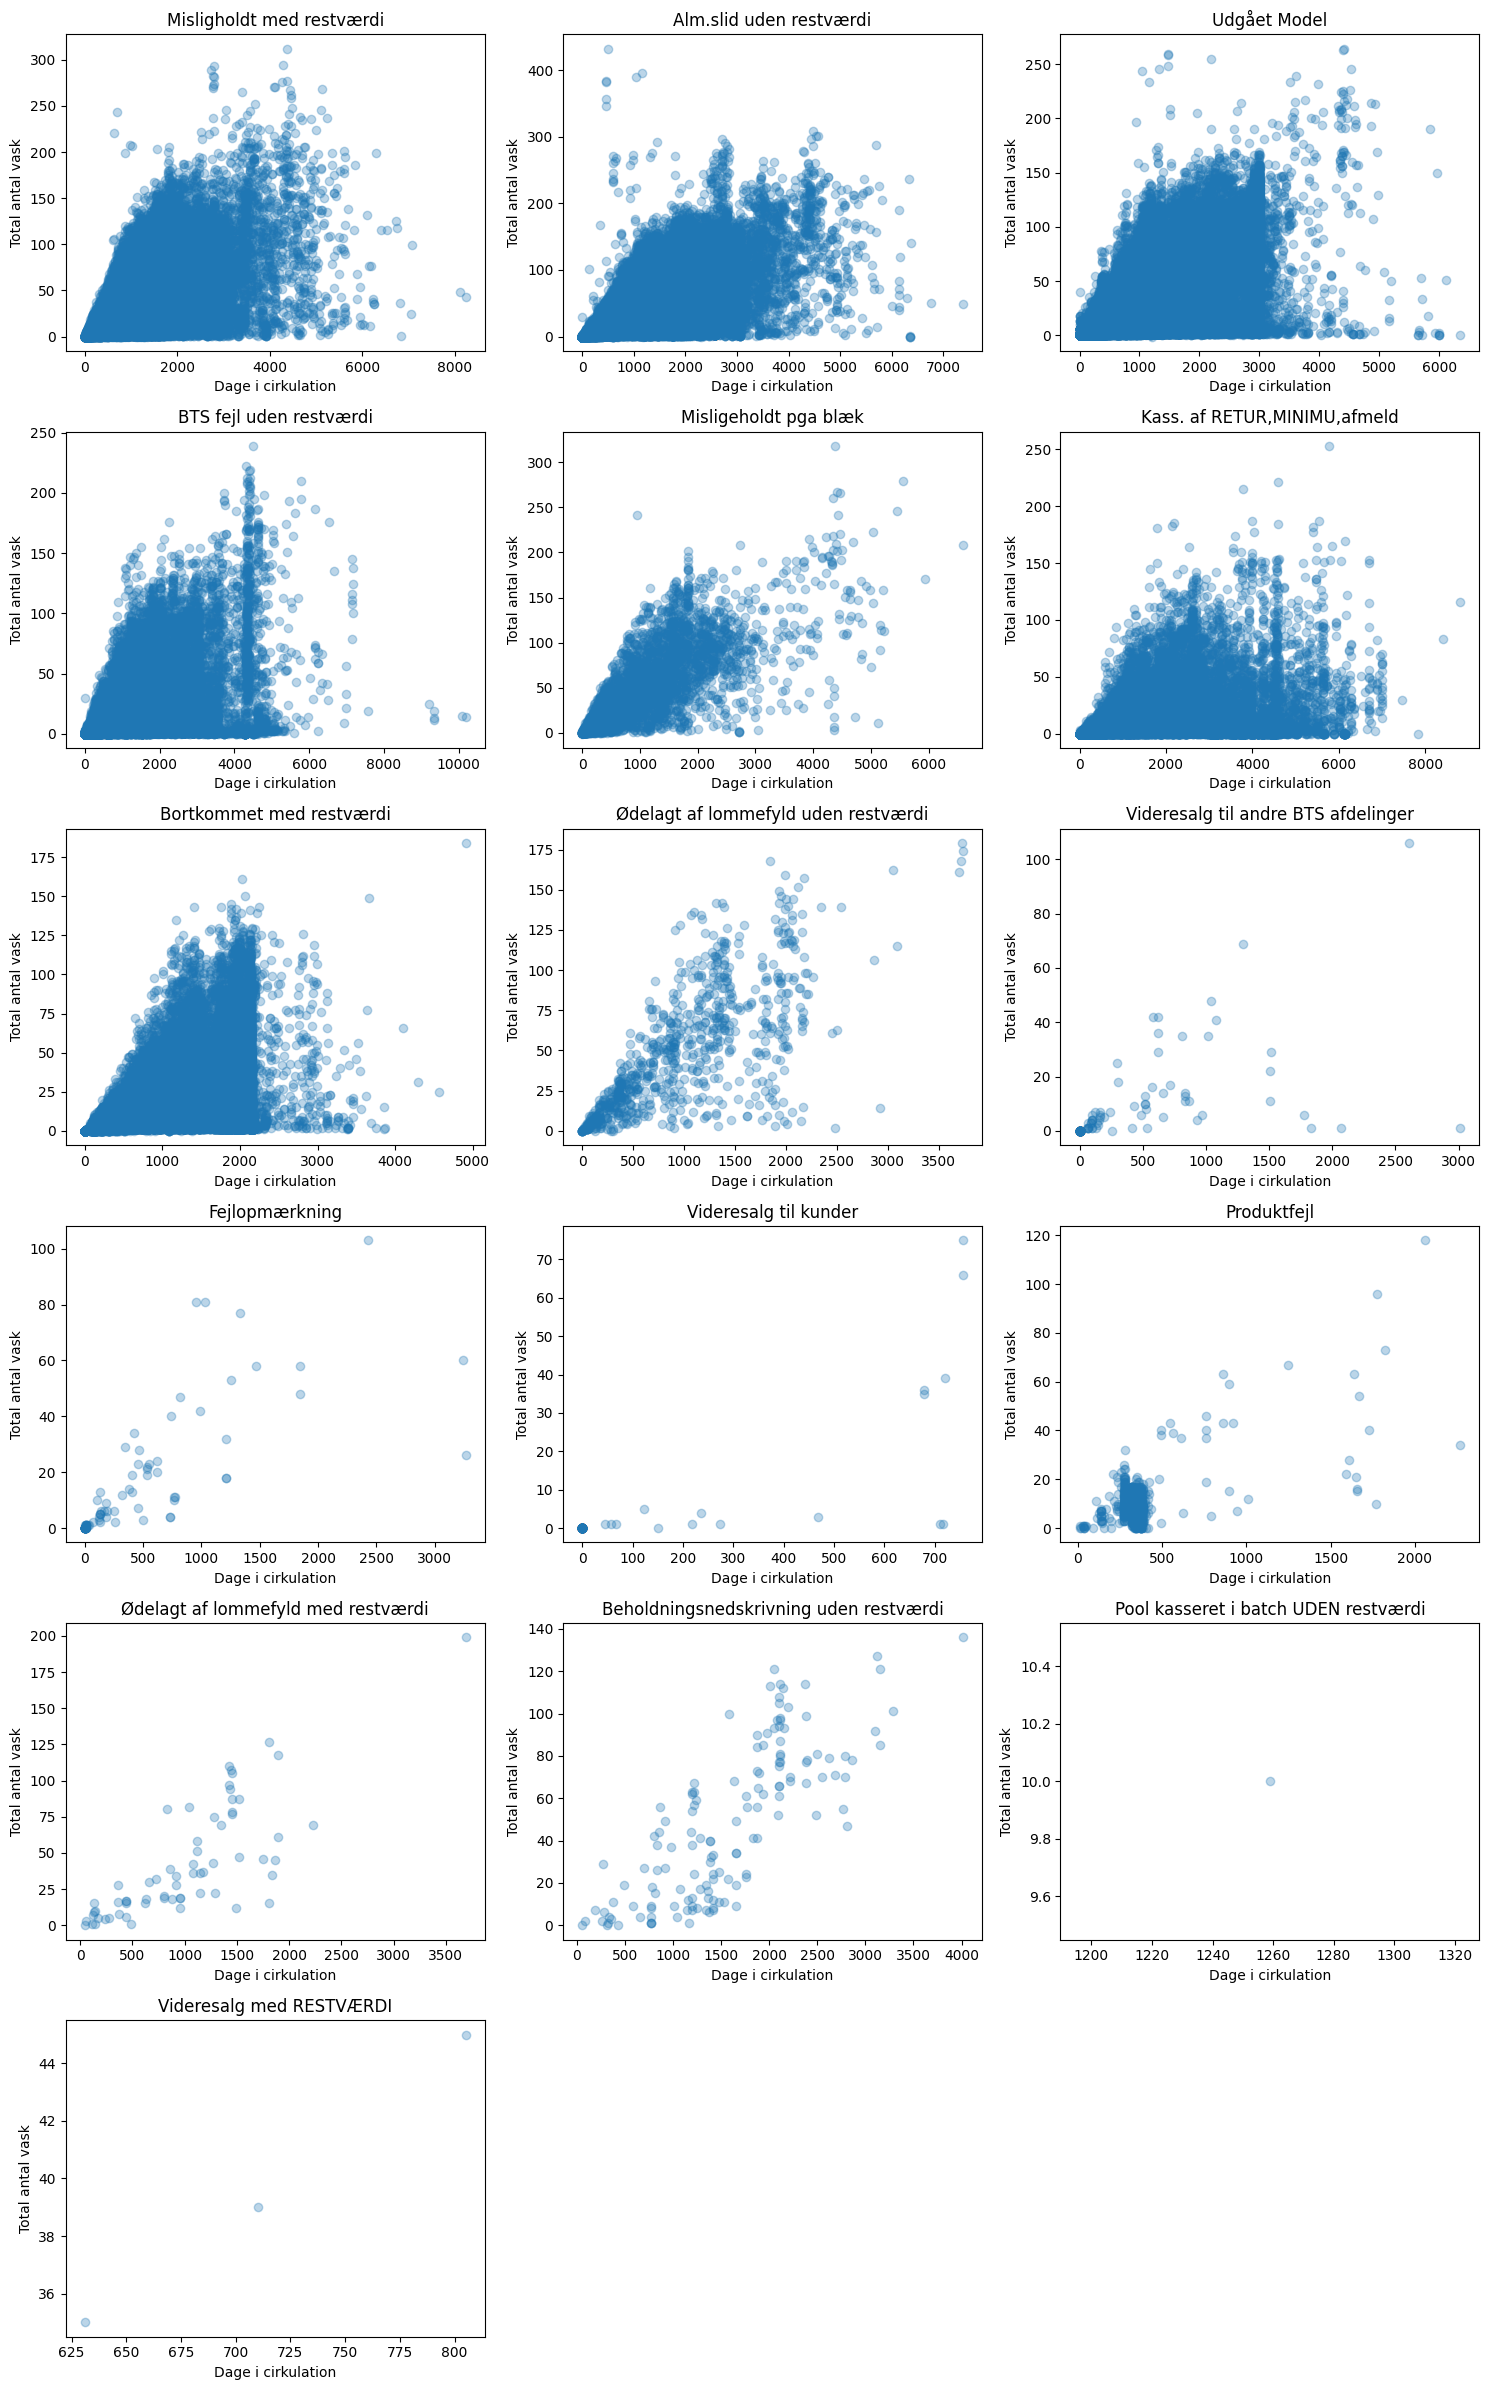

In [3]:
reasons = all_data["Kassationsårsag (ui)"].unique()

n = len(reasons)
cols = 3  # antal plots pr række
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()

for i, reason in enumerate(reasons):
    g = all_data[all_data["Kassationsårsag (ui)"] == reason]
    
    axes[i].scatter(
        g["Dage i cirkulation"],
        g["Total antal vask"],
        alpha=0.3
    )
    
    axes[i].set_title(reason)
    axes[i].set_xlabel("Dage i cirkulation")
    axes[i].set_ylabel("Total antal vask")

# Fjern tomme plots hvis antal ikke passer præcist
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [4]:
df_reason = all_data[
    all_data["Kassationsårsag (ui)"] == "Alm.slid uden restværdi"
]

# Find maksimal vask
max_wash = df_reason["Total antal vask"].max()

# Filtrér dem med max vask
candidates = df_reason[df_reason["Total antal vask"] == max_wash]

# Vælg den med lavest dage
top_left_point = candidates.loc[
    candidates["Dage i cirkulation"].idxmin()
]

top_left_point

Produkt - Produkt                           07093 SWEATSHIRT Euromast KBLÅ P/B
Kassationsårsag (ui)                                   Alm.slid uden restværdi
Stk. tøj per kassationsdato                                                  1
Dage i cirkulation                                                         507
Total antal vask                                                           432
Unik Kode (ui)                                                    00D00B4E8B7A
source_file                    PLC, Product detaljeret, Aarhus, Feb. 2023.xlsx
Name: 115494, dtype: object

In [5]:
most_discarded = (
    all_data
    .groupby("Produkt - Produkt")["Stk. tøj per kassationsdato"]
    .sum()
    .sort_values(ascending=False)
)

most_discarded.head(10)


Produkt - Produkt
09385 T-Shirt Hvid B/P M Arla Tryk    7200
23191 Benkl Mind pullon m opsmøg      7064
01083 T-Shirt unisex hvid k/æ P/B     6779
01589 T-shirt unisex mblå k/æ         6696
13084 T-shirt prowear dame navy pb    6152
14152 Benkl m/lom hvid low risk       5062
28793 Benkl M/Lom Grå Low Risk        4435
12143 Pull on let buks opsmøg mblå    4256
24781 Flex buks da CSR dark rock      4164
09813 T-Shirt Vask                    3781
Name: Stk. tøj per kassationsdato, dtype: int64